<a href="https://colab.research.google.com/github/TeAmP0is0N/Repo-2020/blob/master/julia/julia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt update -q
!apt install cuda gcc-6 g++-6 -y -q
!ln -s /usr/bin/gcc-6 /usr/local/cuda/bin/gcc
!ln -s /usr/bin/g++-6 /usr/local/cuda/bin/g++

--2020-05-27 14:47:53--  https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.16.29
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.16.29|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64.deb?dCJt_Sthuo-1urF-rSRmkTLeM2cdsgB_lMBc7N4k_Uj9T1nVSLH6OwHB3TMEH-U4ZUfj4N0bmmE2PSkM6GLLHCtE3PqfB01Qh5a4Zp0u-eAaqhEIekPd479bt941aDtHrafgRA5CdKCr8CL6bzej8ytSaPgDIdR6mem_jjFWJvnMwiHLLuvO_I4J_eTgrS9AKAIDh5-kqPgqo7sJZzhw [following]
--2020-05-27 14:47:54--  https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64.deb?dCJt_Sthuo-1urF-rSRmkTLeM2cdsgB_lMBc7N4k_Uj9T1nVSLH6OwHB3TMEH-U4ZUfj4N0bmmE2PSkM6GLLHCtE3PqfB01Qh5a4Zp0u-eAaqhEIek

In [2]:
!curl -sSL "https://julialang-s3.julialang.org/bin/linux/x64/1.2/julia-1.2.0-linux-x86_64.tar.gz" -o julia.tar.gz
!tar -xzf julia.tar.gz -C /usr --strip-components 1
!rm -rf julia.tar.gz*
!julia -e 'using Pkg; pkg"add IJulia; add CuArrays; add Flux; precompile"'

   Cloning default registries into `~/.julia`
   Cloning registry from "https://github.com/JuliaRegistries/General.git"
     Added registry `General` to `~/.julia/registries/General`
 Resolving package versions...
 Installed VersionParsing ── v1.2.0
 Installed Parsers ───────── v1.0.4
 Installed ZMQ ───────────── v1.1.0
 Installed JSON ──────────── v0.21.0
 Installed BinaryProvider ── v0.5.10
 Installed MbedTLS ───────── v0.7.0
 Installed Conda ─────────── v1.4.1
 Installed IJulia ────────── v1.21.2
 Installed SoftGlobalScope ─ v1.0.10
  Updating `~/.julia/environments/v1.2/Project.toml`
  [7073ff75] + IJulia v1.21.2
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [b99e7846] + BinaryProvider v0.5.10
  [8f4d0f93] + Conda v1.4.1
  [7073ff75] + IJulia v1.21.2
  [682c06a0] + JSON v0.21.0
  [739be429] + MbedTLS v0.7.0
  [69de0a69] + Parsers v1.0.4
  [b85f4697] + SoftGlobalScope v1.0.10
  [81def892] + VersionParsing v1.2.0
  [c2297ded] + ZMQ v1.1.0
  [2a0f44e3] + Base64 
  [ade2ca70]

In [3]:
1

1

In [4]:
1+1

2

In [1]:
[1, 2, 3]

3-element Array{Int64,1}:
 1
 2
 3

In [0]:
using LinearAlgebra

In [3]:
[i + j for i in 1:10, j in 1:10]

10×10 Array{Int64,2}:
  2   3   4   5   6   7   8   9  10  11
  3   4   5   6   7   8   9  10  11  12
  4   5   6   7   8   9  10  11  12  13
  5   6   7   8   9  10  11  12  13  14
  6   7   8   9  10  11  12  13  14  15
  7   8   9  10  11  12  13  14  15  16
  8   9  10  11  12  13  14  15  16  17
  9  10  11  12  13  14  15  16  17  18
 10  11  12  13  14  15  16  17  18  19
 11  12  13  14  15  16  17  18  19  20

In [4]:
using Flux

┌ Warning: CUDA 10.2 is not supported by
│ your driver (which supports up to 10.1)
└ @ CUDAnative /root/.julia/packages/CUDAnative/Phjco/src/CUDAnative.jl:182


In [6]:
NNODE = Chain(x -> [x],
           Dense(1,32,tanh),
           Dense(32,1),
           first)
NNODE(1.0)

-0.22675896f0

In [7]:
g(t) = t*NNODE(t) + 1f0

g (generic function with 1 method)

In [8]:
using Statistics
ϵ = sqrt(eps(Float32))
loss() = mean(abs2(((g(t+ϵ)-g(t))/ϵ) - cos(2π*t)) for t in 0:1f-2:1f0)

loss (generic function with 1 method)

In [10]:
opt = Flux.Descent(0.01)
data = Iterators.repeated((), 5000)
iter = 0
cb = function () #callback function to observe training
  global iter += 1
  if iter % 500 == 0
    display(loss())
  end
end
display(loss())

0.5732680865517993

In [11]:
Flux.train!(loss, Flux.params(NNODE), data, opt; cb=cb)

0.4942395284320998

0.4708080502513265

0.3987400851557276

0.21981238011062745

0.05230301231123446

0.017876623851939843

0.012440006726160259

0.010800092685994453

0.010054423182167888

0.009531763043139612

In [12]:
using Plots
t = 0:0.001:1.0
plot(t,g.(t),label="NN")
plot!(t,1.0 .+ sin.(2π.*t)/2π, label = "True")

ArgumentError: ignored

In [13]:
import Pkg;
Pkg.add("Plots")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
 Installed Showoff ───────── v0.3.1
 Installed Measures ──────── v0.3.1
 Installed RecipesPipeline ─ v0.1.9
 Installed RecipesBase ───── v1.0.1
 Installed ArrayLayouts ──── v0.2.6
 Installed Zygote ────────── v0.4.20
 Installed Contour ───────── v0.5.3
 Installed Plots ─────────── v1.0.14
 Installed FFMPEG ────────── v0.2.4
 Installed PlotThemes ────── v1.0.3
 Installed GeometryTypes ─── v0.8.3
 Installed PlotUtils ─────── v0.6.5
 Installed GR ────────────── v0.48.0
  Updating `~/.julia/environments/v1.2/Project.toml`
  [91a5bcdd] + Plots v1.0.14
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [4c555306] + ArrayLayouts v0.2.6
  [d38c429a] + Contour v0.5.3
  [c87230d0] + FFMPEG v0.2.4
  [7a1cc6ca] - FFTW v1.1.0
  [28b8d3ca] + GR v0.48.0
  [4d00f742] + GeometryTypes v0.8.3
  [442fdcdd] + Measures v0.3.1
  [ccf2f8ad] + PlotThemes 

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1242


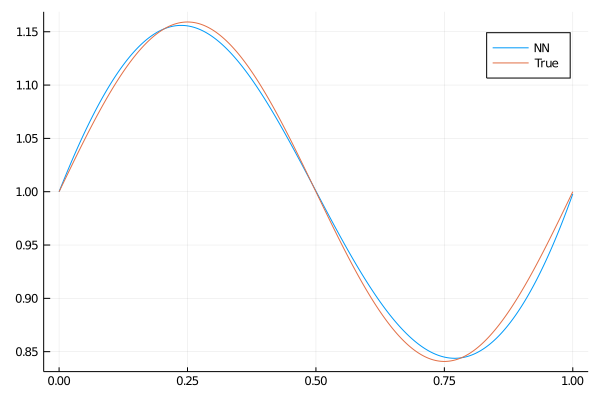

In [14]:
using Plots
t = 0:0.001:1.0
plot(t,g.(t),label="NN")
plot!(t,1.0 .+ sin.(2π.*t)/2π, label = "True")

In [15]:
W = [randn(32,10),randn(32,32),randn(5,32)]
b = [zeros(32),zeros(32),zeros(5)]

3-element Array{Array{Float64,1},1}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0]                                                                              

In [16]:
NN(x) = W[3]*tanh.(W[2]*tanh.(W[1]*x + b[1]) + b[2]) + b[3]
NN(rand(10))

5-element Array{Float64,1}:
 -7.378149723656156
  4.661770264658618
  5.235999216748236
  5.353587067864548
  5.24412722650813 

In [17]:
NN3 = Chain(Dense(10,32,x->x^2),
            Dense(32,32,x->max(0,x)),
            Dense(32,5))
NN(rand(10))

5-element Array{Float64,1}:
 -4.995369349244915 
  3.2167626020650357
  6.342144536924922 
  7.536592296726274 
  3.8858781924875485

In [18]:
function lotka!(du,u,p,t)
    x,y = u
    α,β,γ,δ = p
    du[1] = α*x - β*x*y
    du[2] = -δ*y + γ*x*y
end

lotka! (generic function with 1 method)

In [19]:
u0 = [1.0,1.0]
p = [1.5,1.0,3.0,1.0]
tspan = (0.0,10.0)

(0.0, 10.0)

In [20]:
import Pkg;
Pkg.add("DifferentialEquations")

 Resolving package versions...


Pkg.Types.ResolverError: ignored

In [21]:
using DifferentialEquations, Plots
prob = ODEProblem(lotka!,u0,tspan,p)
sol = solve(prob)
plot(sol)


ArgumentError: ignored

In [22]:
import Pkg; 
Pkg.add("DifferentialEquations")

 Resolving package versions...


Pkg.Types.ResolverError: ignored

In [23]:
using CUDAdrv; CUDAdrv.name(CuDevice(0))

ArgumentError: ignored

In [24]:
import Pkg;
Pkg.add("CUDSdrv")

Pkg.Types.PkgError: ignored

In [26]:
!julia -e 'using Pkg; pkg"add DifferentialEquations; add Optim; add Test; add DiffEqDevTools; add NeuralNetDiffEq; add Random; precompile"'

LoadError: ignored

In [27]:
!julia -e 'using Pkg; pkg"add DifferentialEquations; add Optim; add Test; precompile"'

LoadError: ignored

In [28]:
import Pkg;
Pkg.add("Optim")

 Resolving package versions...
 Installed UnPack ───────────────── v1.0.1
 Installed Parameters ───────────── v0.12.1
 Installed NLSolversBase ────────── v7.6.1
 Installed FiniteDiff ───────────── v2.3.2
 Installed Compat ───────────────── v3.10.0
 Installed ArrayInterface ───────── v2.8.7
 Installed LineSearches ─────────── v7.0.1
 Installed Optim ────────────────── v0.21.0
 Installed PositiveFactorizations ─ v0.2.3
  Updating `~/.julia/environments/v1.2/Project.toml`
  [429524aa] + Optim v0.21.0
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [4fba245c] + ArrayInterface v2.8.7
  [34da2185] + Compat v3.10.0
  [6a86dc24] + FiniteDiff v2.3.2
  [d3d80556] + LineSearches v7.0.1
  [d41bc354] + NLSolversBase v7.6.1
  [429524aa] + Optim v0.21.0
  [d96e819e] + Parameters v0.12.1
  [85a6dd25] + PositiveFactorizations v0.2.3
  [3a884ed6] + UnPack v1.0.1
  [1a1011a3] + SharedArrays 


In [29]:
import Pkg;
Pkg.add("Test")

 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
  [8dfed614] + Test 
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


In [30]:
import Pkg;
Pkg.add("DiffEqDevTools")

 Resolving package versions...


Pkg.Types.ResolverError: ignored

In [6]:
]st

SyntaxError: ignored